# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 628


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = 'metric'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units={units}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | tabou
Processing Record 2 of Set 1 | ribeira grande
Processing Record 3 of Set 1 | avarua
Processing Record 4 of Set 1 | vaini
Processing Record 5 of Set 1 | kapaa
Processing Record 6 of Set 1 | vila velha
Processing Record 7 of Set 1 | menongue
Processing Record 8 of Set 1 | lorengau
Processing Record 9 of Set 1 | bengkulu
Processing Record 10 of Set 1 | manavalakurichi
Processing Record 11 of Set 1 | pisco
Processing Record 12 of Set 1 | hermanus
Processing Record 13 of Set 1 | kushmurun
Processing Record 14 of Set 1 | kuche
City not found. Skipping...
Processing Record 15 of Set 1 | albany
Processing Record 16 of Set 1 | mataura
Processing Record 17 of Set 1 | puerto ayora
Processing Record 18 of Set 1 | hamilton
Processing Record 19 of Set 1 | ikalamavony
Processing Record 20 of Set 1 | port-gentil
Processing Record 21 of Set 1 | korla
Processing Record 22 of Set 1 | mitsamiouli
Processing Re

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          585
Lat           585
Lng           585
Max Temp      585
Humidity      585
Cloudiness    585
Wind Speed    585
Country       585
Date          585
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,tabou,4.4230,-7.3528,25.10,87,54,0.59,CI,1675234320
1,ribeira grande,38.5167,-28.7000,12.10,81,100,2.24,PT,1675234321
2,avarua,-21.2078,-159.7750,26.03,78,75,6.17,CK,1675234247
3,vaini,-21.2000,-175.2000,28.09,83,75,4.12,TO,1675234322
4,kapaa,22.0752,-159.3190,23.18,91,20,3.09,US,1675234322


In [9]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [11]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,tabou,4.4230,-7.3528,25.10,87,54,0.59,CI,1675234320
1,ribeira grande,38.5167,-28.7000,12.10,81,100,2.24,PT,1675234321
2,avarua,-21.2078,-159.7750,26.03,78,75,6.17,CK,1675234247
3,vaini,-21.2000,-175.2000,28.09,83,75,4.12,TO,1675234322
4,kapaa,22.0752,-159.3190,23.18,91,20,3.09,US,1675234322


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

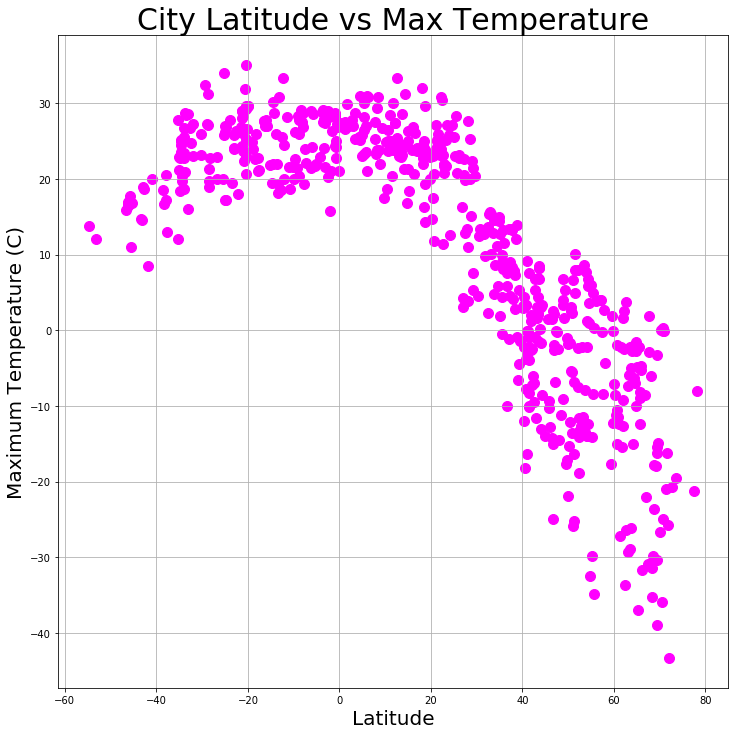

In [13]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot(kind="scatter", x="Lat", y="Max Temp", grid=True, figsize=(12,12), s=100, c='fuchsia')

# Incorporate the other graph properties
plt.title("City Latitude vs Max Temperature", fontsize = 30)
plt.xlabel("Latitude", fontsize=20)
plt.ylabel("Maximum Temperature (C)", fontsize=20)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

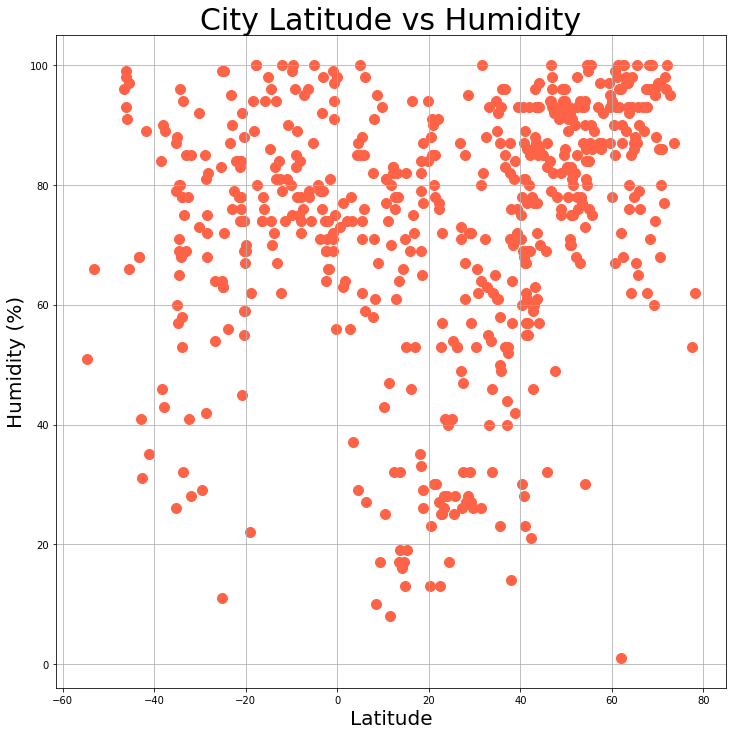

In [14]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot(kind="scatter", x="Lat", y="Humidity", grid=True, figsize=(12,12), s=100, c='tomato')

# Incorporate the other graph properties
plt.title("City Latitude vs Humidity", fontsize = 30)
plt.xlabel("Latitude", fontsize=20)
plt.ylabel("Humidity (%)", fontsize=20)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

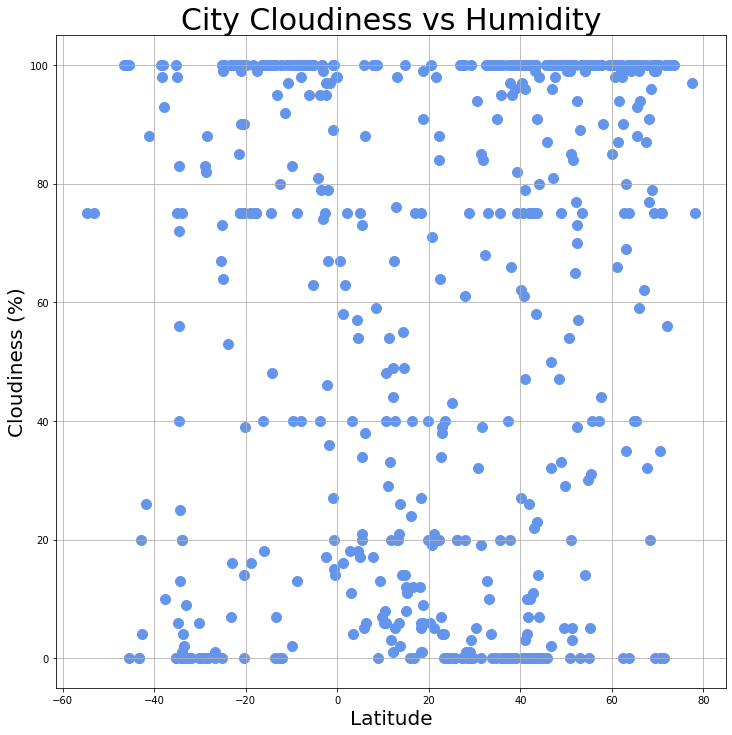

In [15]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot(kind="scatter", x="Lat", y="Cloudiness", grid=True, figsize=(12,12), s=100, c='cornflowerblue')

# Incorporate the other graph properties
plt.title("City Cloudiness vs Humidity", fontsize = 30)
plt.xlabel("Latitude", fontsize=20)
plt.ylabel("Cloudiness (%)", fontsize=20)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

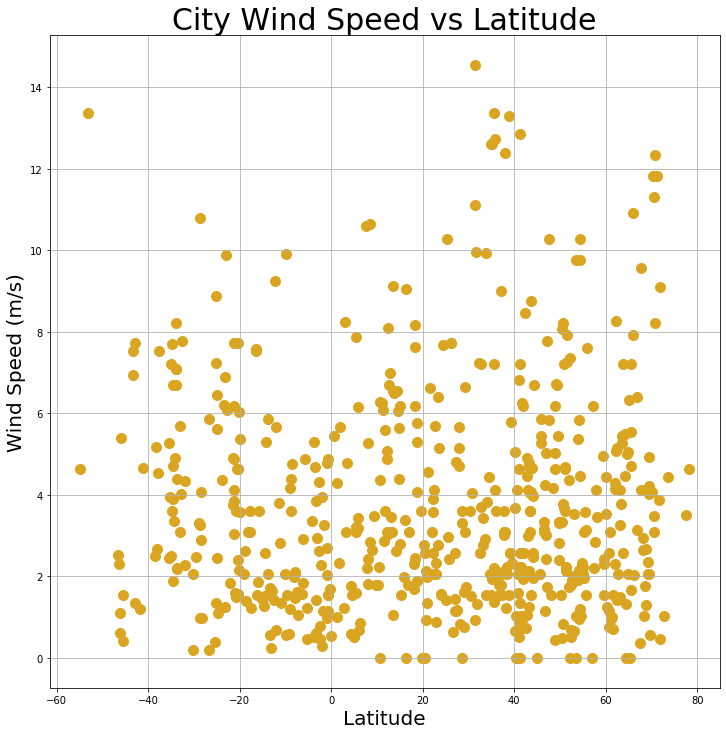

In [16]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot(kind="scatter", x="Lat", y="Wind Speed", grid=True, figsize=(12,12), s=100, c='goldenrod')

# Incorporate the other graph properties
plt.title("City Wind Speed vs Latitude", fontsize = 30)
plt.xlabel("Latitude", fontsize=20)
plt.ylabel("Wind Speed (m/s)", fontsize=20)


# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [17]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

In [18]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,tabou,4.4230,-7.3528,25.10,87,54,0.59,CI,1675234320
1,ribeira grande,38.5167,-28.7000,12.10,81,100,2.24,PT,1675234321
4,kapaa,22.0752,-159.3190,23.18,91,20,3.09,US,1675234322
9,manavalakurichi,8.1333,77.3000,29.42,61,100,2.42,IN,1675234326
12,kushmurun,52.4503,64.6311,-13.26,93,39,1.79,KZ,1675234329


In [19]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,avarua,-21.2078,-159.7750,26.03,78,75,6.17,CK,1675234247
3,vaini,-21.2000,-175.2000,28.09,83,75,4.12,TO,1675234322
5,vila velha,-20.3297,-40.2925,22.97,88,0,1.54,BR,1675234323
6,menongue,-14.6585,17.6910,19.48,86,100,1.27,AO,1675234324
7,lorengau,-2.0226,147.2712,28.33,74,79,3.95,PG,1675234324


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.8592.


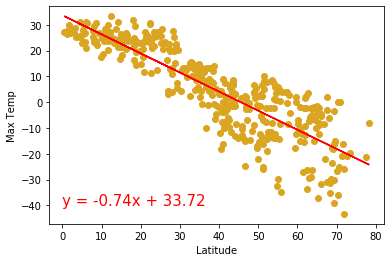

In [20]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, c='goldenrod')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,-40),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-value is: {abs(round(st.pearsonr(x_values,y_values)[0],4))}.")

plt.show()

The r-value is: 0.4488.


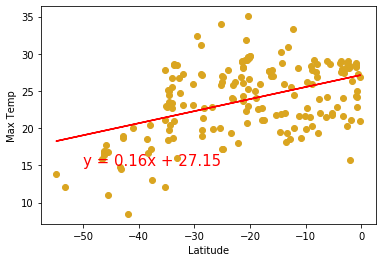

In [21]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, c='goldenrod')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,15),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-value is: {abs(round(st.pearsonr(x_values,y_values)[0],4))}.")

plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.435.


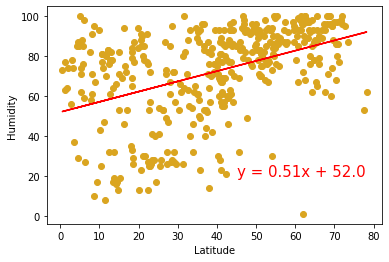

In [22]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, c='goldenrod')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-value is: {abs(round(st.pearsonr(x_values,y_values)[0],4))}.")

plt.show()

The r-value is: 0.2358.


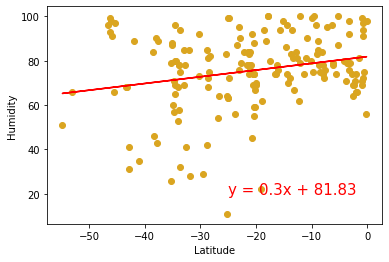

In [23]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, c='goldenrod')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-25,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-value is: {abs(round(st.pearsonr(x_values,y_values)[0],4))}.")

plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.4083.


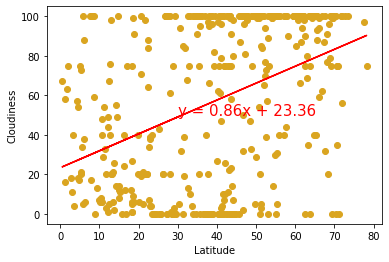

In [24]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, c='goldenrod')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(30,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-value is: {abs(round(st.pearsonr(x_values,y_values)[0],4))}.")

plt.show()

The r-value is: 0.2812.


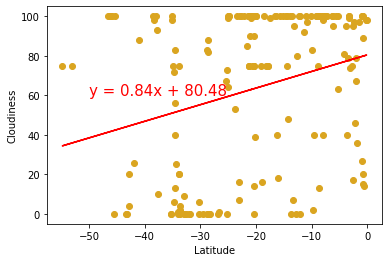

In [25]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, c='goldenrod')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,60),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-value is: {abs(round(st.pearsonr(x_values,y_values)[0],4))}.")

plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.0166.


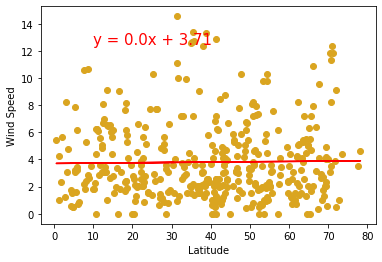

In [26]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, c='goldenrod')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,12.5),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-value is: {abs(round(st.pearsonr(x_values,y_values)[0],4))}.")

plt.show()

The r-value is: 0.3106.


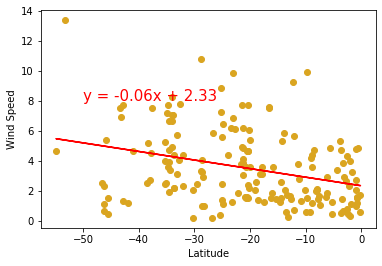

In [27]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, c='goldenrod')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-value is: {abs(round(st.pearsonr(x_values,y_values)[0],4))}.")

plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

**Additional Analysis** 

In [28]:
# look at all correlations within the northern hemisphere dataframe
north_corr = northern_hemi_df.corr()
north_corr.unstack().sort_values()

Lat         Max Temp     -0.859234
Max Temp    Lat          -0.859234
            Humidity     -0.441849
Humidity    Max Temp     -0.441849
Cloudiness  Max Temp     -0.276839
Max Temp    Cloudiness   -0.276839
Humidity    Lng          -0.193812
Lng         Humidity     -0.193812
Date        Humidity     -0.118004
Humidity    Date         -0.118004
Date        Lat          -0.090474
Lat         Date         -0.090474
Wind Speed  Humidity     -0.061014
Humidity    Wind Speed   -0.061014
Lng         Lat          -0.003744
Lat         Lng          -0.003744
            Wind Speed    0.016611
Wind Speed  Lat           0.016611
            Date          0.046596
Date        Wind Speed    0.046596
Max Temp    Lng           0.053443
Lng         Max Temp      0.053443
Date        Cloudiness    0.082460
Cloudiness  Date          0.082460
            Wind Speed    0.102788
Wind Speed  Cloudiness    0.102788
Cloudiness  Lng           0.126582
Lng         Cloudiness    0.126582
Wind Speed  Max Temp

In [29]:
south_corr = southern_hemi_df.corr()
south_corr.unstack().sort_values()

Humidity    Wind Speed   -0.385753
Wind Speed  Humidity     -0.385753
Lat         Wind Speed   -0.310616
Wind Speed  Lat          -0.310616
Max Temp    Humidity     -0.279294
Humidity    Max Temp     -0.279294
Date        Wind Speed   -0.273264
Wind Speed  Date         -0.273264
Lng         Humidity     -0.271310
Humidity    Lng          -0.271310
Cloudiness  Wind Speed   -0.162906
Wind Speed  Cloudiness   -0.162906
Lat         Lng          -0.080740
Lng         Lat          -0.080740
Humidity    Date         -0.022459
Date        Humidity     -0.022459
            Cloudiness    0.031406
Cloudiness  Date          0.031406
Max Temp    Date          0.040573
Date        Max Temp      0.040573
Lng         Date          0.052552
Date        Lng           0.052552
Max Temp    Cloudiness    0.064857
Cloudiness  Max Temp      0.064857
Wind Speed  Lng           0.072946
Lng         Wind Speed    0.072946
            Cloudiness    0.112011
Cloudiness  Lng           0.112011
Lat         Date    